# Telecom Chrun Case Study 

# # Problem Statement



#### Step 1 : Reading and understanding the data

In [83]:
#! mkdir ~/.kaggle

In [84]:
#! cp kaggle.json ~/.kaggle/

In [85]:
#! chmod 600 ~/.kaggle/kaggle.json

In [86]:
#! kaggle competitions download telecom-churn-case-study-hackathon-c42

In [87]:
#! unzip telecom-churn-case-study-hackathon-c42

In [88]:
#pip install matplotlib --upgrade

In [89]:
#pip install xgboost --upgrade

In [90]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [91]:
df = pd.read_csv('train.csv')
df.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


This will automatically assign date columns solution from "https://stackoverflow.com/questions/33204500/pandas-automatically-detect-date-columns-at-run-time"

In [93]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass

In [94]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    arpu_6                    float64       
 9    arpu_7                    float64       
 10   arpu_8                    float64       
 11   onnet_mou_6               float64       
 12   onnet_mou_7               float64       
 13   onnet_mou_8               float64       
 14   offnet_mou_6              float64       
 15   offnet_mou_7              float64       
 16   offnet_mou_8              float64     

In [95]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [96]:
df.shape

(69999, 172)

#### Step 2 : Data Cleaning

In [97]:

#Understand the exact percentage of data missing from the list 

df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_m

In [98]:
data_desc = pd.read_csv('data_dictionary.csv')
data_desc

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### Data Breakdown

From looking at the Description and checking the data, we can safely assume that Rech columns where there are missing values are due to customer not recharging in those months so it will be safe to impute 0 in there. 


### Imputing 0 in for recharge missing values


- total_rech_data_6           
- total_rech_data_7          
- total_rech_data_8           
- max_rech_data_6             
- max_rech_data_7             
- max_rech_data_8             
- count_rech_2g_6             
- count_rech_2g_7             
- count_rech_2g_8             
- count_rech_3g_6             
- count_rech_3g_7            
- count_rech_3g_8             
- av_rech_amt_data_6          
- av_rech_amt_data_7          
- av_rech_amt_data_8          


- count_rech_3g_6   =           74.902499
- count_rech_3g_7   =            74.478207
- count_rech_3g_8   =          73.689624

----------------------------------------------------
These columns are missing more than 70% and not recharge columns so these will need to removed
- arpu_3g_6        =           74.902499
- arpu_3g_7        =           74.478207
- arpu_3g_8        =           73.689624
- arpu_2g_6        =           74.902499
- arpu_2g_7        =           74.478207
- arpu_2g_8        =           73.689624

----------------------------------------------------

As they all relate to recharge, we can assume recharge and other columns got relationship. Although in rest of the columns there are some categorical variables as well so they need to imputed differently

- night_pck_user_6       =     74.902499
- night_pck_user_7       =     74.478207
- night_pck_user_8       =     73.689624
- fb_user_6              =     74.902499
- fb_user_7              =     74.478207
- fb_user_8              =     73.689624

These will be imputed with -1 instead of 0, since 0 and 1 holds a meaning there.

In [99]:
recharge = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

df[recharge] = df[recharge].apply(lambda x: x.fillna(0))

#df = df.drop(recharge, axis =1)

relat_rech = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8']

df[relat_rech] = df[relat_rech].apply(lambda x: x.fillna(-1))

In [100]:
df = df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis =1)

In [101]:
list(df.select_dtypes(['datetime64[ns]']).columns)

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

Date columns will be droped as they hold no value on the churn decision making skills these columns will be dropped

In [102]:
date_col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df = df.drop(date_col, axis =1)

Next we can also drop ID and Circle ID values since they do not hold useful relationships.

In [103]:
df = df.drop(['id','circle_id'], axis =1)

Next will be to look at the following list of missing data that are similar based on KPI month

2 sets shown below for example 
- onnet_mou_6   =      3.954342
- onnet_mou_7   =      3.838626
- onnet_mou_8   =      5.290076
- offnet_mou_6  =      3.954342
- offnet_mou_7  =      3.838626
- offnet_mou_8  =      5.290076

and as can be seen above they are all related to calls and when looked closely it can seen that most of the poeple with missing column values are related to churned people so they need to be imputed with 0, they cant be ignored as the data suggests they they are people who are churning. 

In [104]:
df = df.fillna(0)

In [105]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

In [106]:
df.shape

(69999, 155)

### Filter out High Value Customers

In [107]:
#df['total_d_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
#df['total_d_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
#df['total_d_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']

In [108]:
#df['total_recharge_6'] = df['total_d_6'] + df['total_rech_amt_6']
#df['total_recharge_7'] = df['total_d_7'] + df['total_rech_amt_7']
#df['total_recharge_8'] = df['total_d_8'] + df['total_rech_amt_8']

In [109]:
# now find the average of the three months
#f['avergae_rec_6_7_8'] = (df['total_recharge_6']+df['total_recharge_7'] )/2

In [110]:
#70 percentile of the recharge amount is calculated
#df['avergae_rec_6_7_8'].quantile(0.7)

To filter out the high end customers the data will be cut at 70 percetile amount stated above

In [111]:
#df_cut = df.loc[df['avergae_rec_6_7_8'] >= df['avergae_rec_6_7_8'].quantile(0.7), :]
#df_cut = df_cut.reset_index(drop=True)

df.shape

(69999, 155)

In [112]:
num_train = df.select_dtypes(include=['number'])
cat_train = df.select_dtypes(exclude=['number'])
churn_col = num_train['churn_probability']
num_train = num_train.drop(['churn_probability'], axis =1)

Q1 = num_train.quantile(0.01)
Q3 = num_train.quantile(0.99)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
df_cut = pd.concat([num_train.loc[idx], cat_train.loc[idx], churn_col.loc[idx]], axis=1)


In [113]:
df_cut.shape

(63709, 155)

In [114]:
#Derive a New Variable

df_cut['months_network'] = (df_cut['aon'])//30
#Drop the columns since we already have months from the date
df.drop('aon', axis=1, inplace = True)


### Step 3  : Data Visualisation and EDA

 Before we figure out the which are high hitting customers (where the risk lies), lets observe the data and figure out the trend.

<AxesSubplot: ylabel='None'>

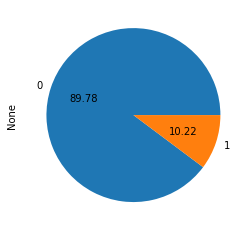

In [115]:
# first thing is to understand the churned customer vs non churned customer ratio.
#color pallette to use 

df_cut.groupby('churn_probability').size().plot(kind='pie', autopct='%.2f')

From the above pie plot its shown that 6.33% of customers have churned, compared to non churned data can see be seen as imbalanced.


Lets check out what the categorical information stated above shows in the data in relationship to churn.

In [116]:
from matplotlib.ticker import PercentFormatter

def bivar_plotting(base,xlabelTitle,ylabelTitle,chartTitle):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
        sns.histplot(data=df_cut, x=base, hue='churn_probability',hue_order= [1,0], binwidth=10, stat='percent', multiple=multiple, ax=ax)
        ax.set_title(f"multiple='{multiple}'")

    for bar_group, color in zip(ax.containers, ['black', 'white']):
        ax.bar_label(bar_group, label_type='center', color=color,
        labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax1.set_title(chartTitle,size=24)
    ax1.set_ylabel(ylabelTitle, fontsize = 16) 
    ax1.set_xlabel(xlabelTitle, fontsize = 16) 
    ax2.set_title(chartTitle,size=24)
    ax2.set_ylabel(ylabelTitle, fontsize = 16) 
    ax2.set_xlabel(xlabelTitle, fontsize = 16) 
    plt.tight_layout()
    plt.show()

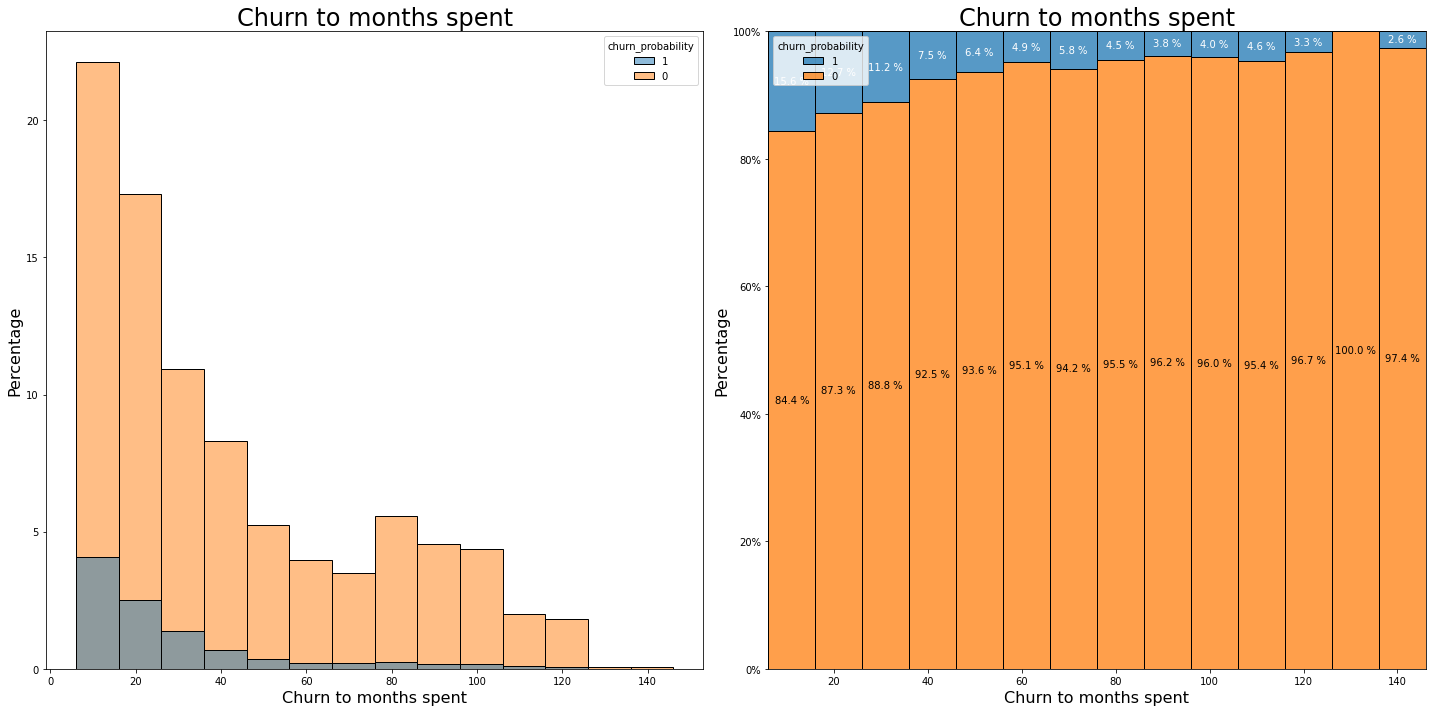

In [117]:
bivar_plotting('months_network','Churn to months spent', 'Percentage', 'Churn to months spent')

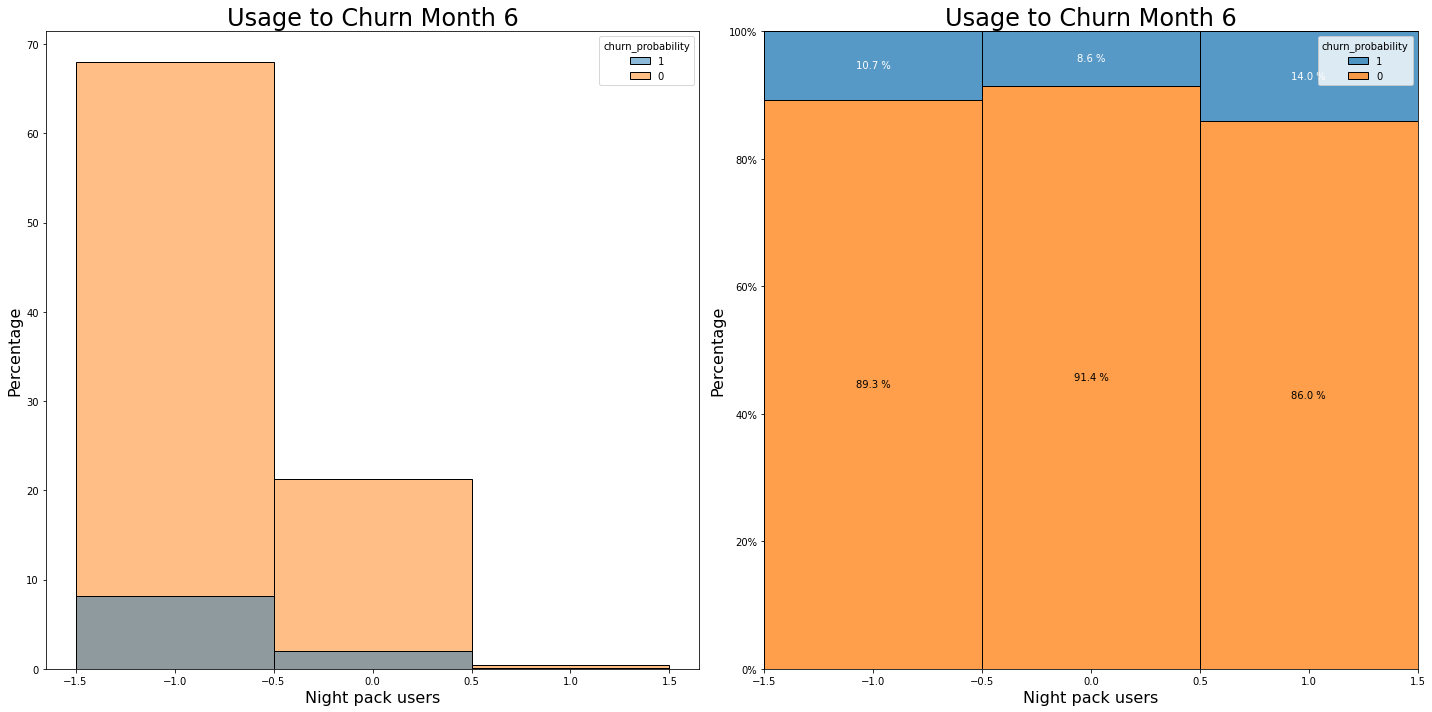

In [118]:
df_cut['night_pck_user_6'] = df_cut.night_pck_user_6.astype('category')
bivar_plotting('night_pck_user_6','Night pack users', 'Percentage', 'Usage to Churn Month 6')

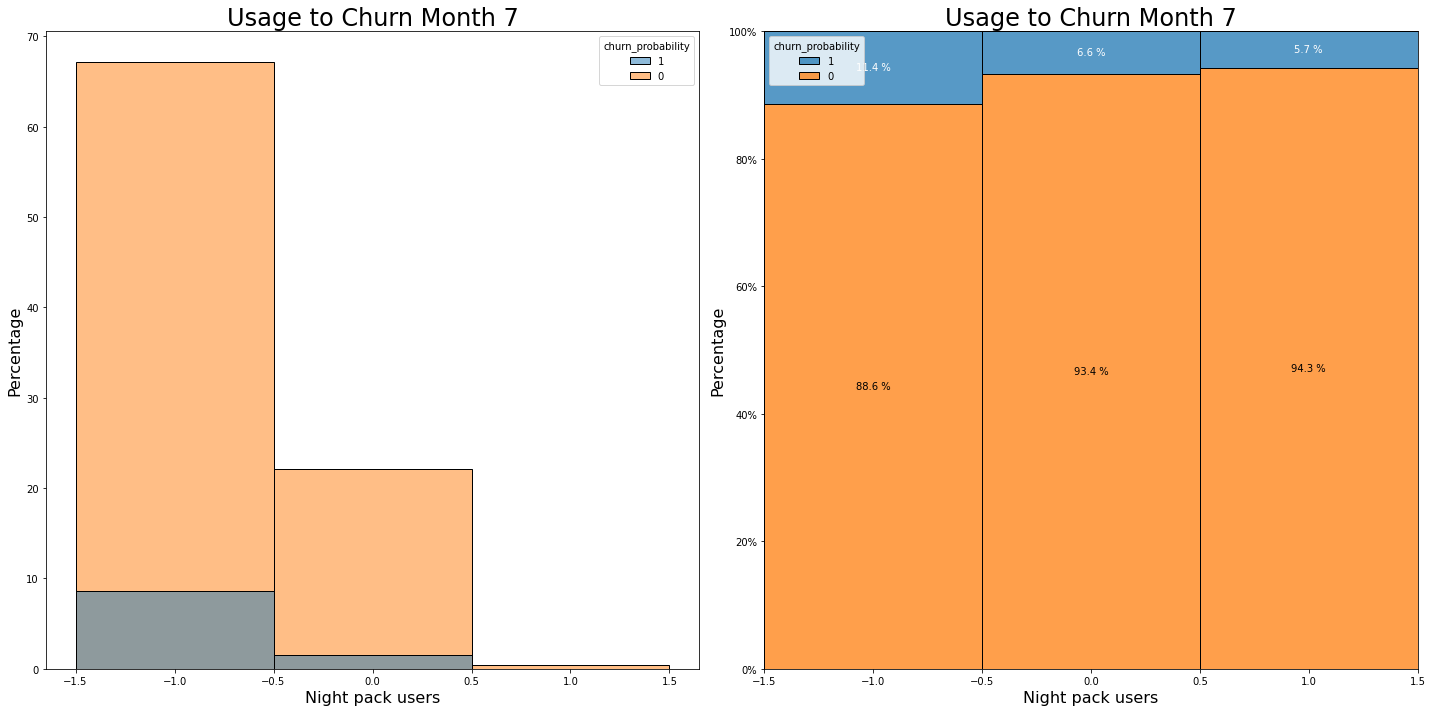

In [119]:
df_cut['night_pck_user_7'] = df_cut.night_pck_user_7.astype('category')
bivar_plotting('night_pck_user_7','Night pack users', 'Percentage', 'Usage to Churn Month 7')

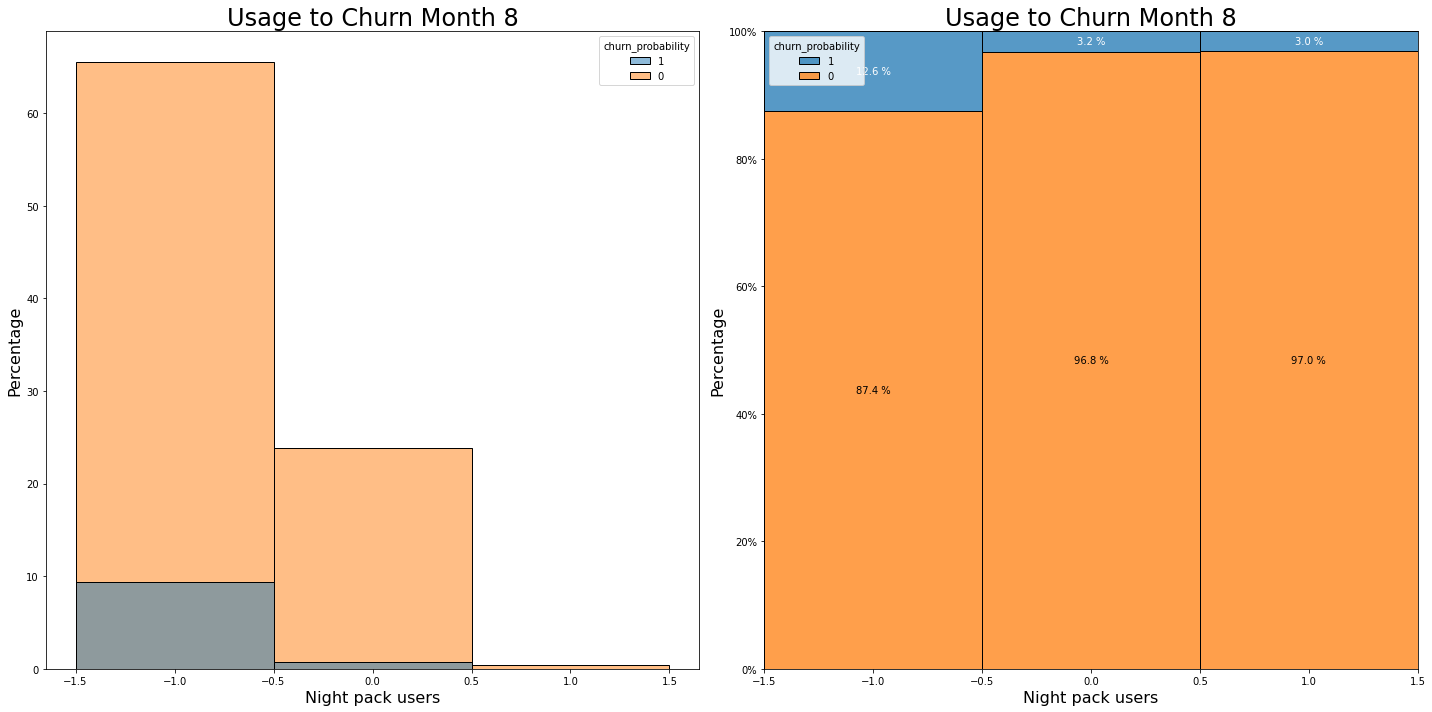

In [120]:
df_cut['night_pck_user_8'] = df_cut.night_pck_user_8.astype('category')
bivar_plotting('night_pck_user_8','Night pack users', 'Percentage', 'Usage to Churn Month 8')

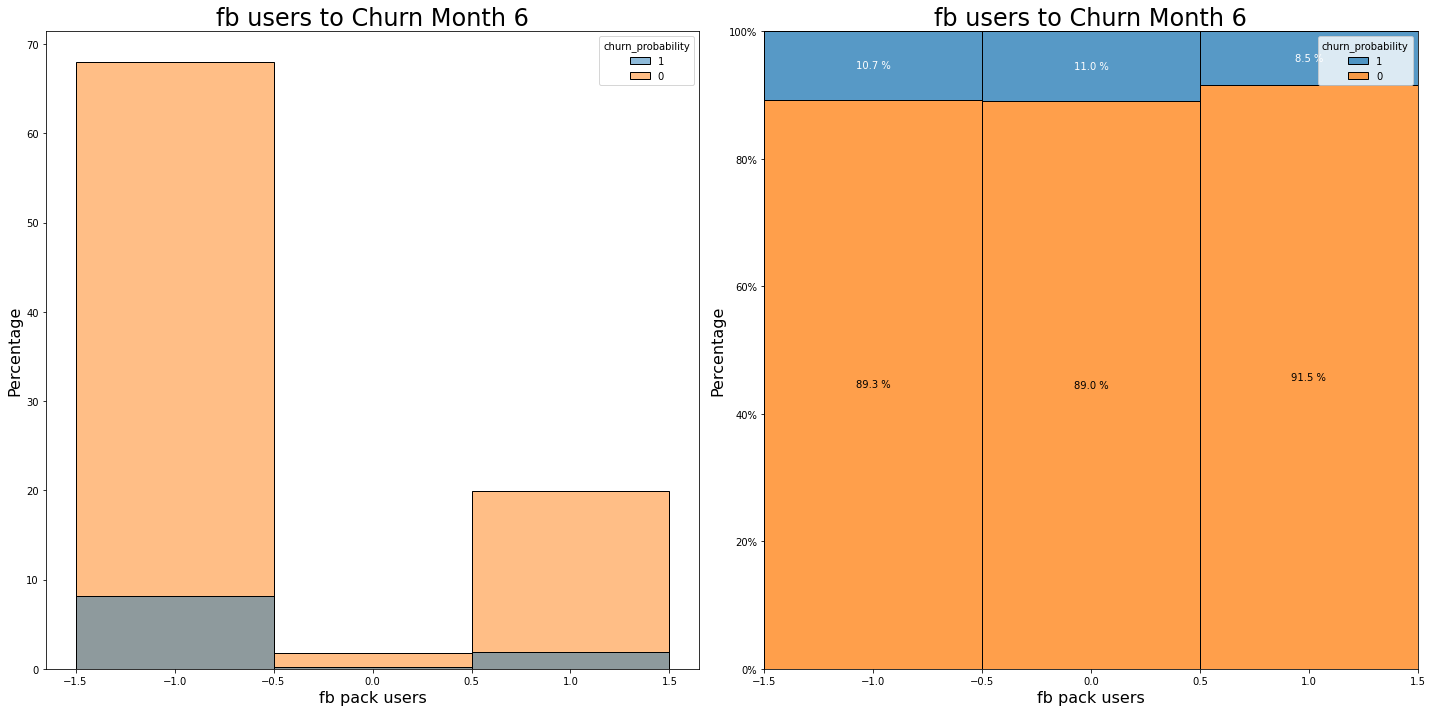

In [121]:
df_cut['fb_user_6'] = df_cut.fb_user_6.astype('category')
bivar_plotting('fb_user_6','fb pack users', 'Percentage', 'fb users to Churn Month 6')

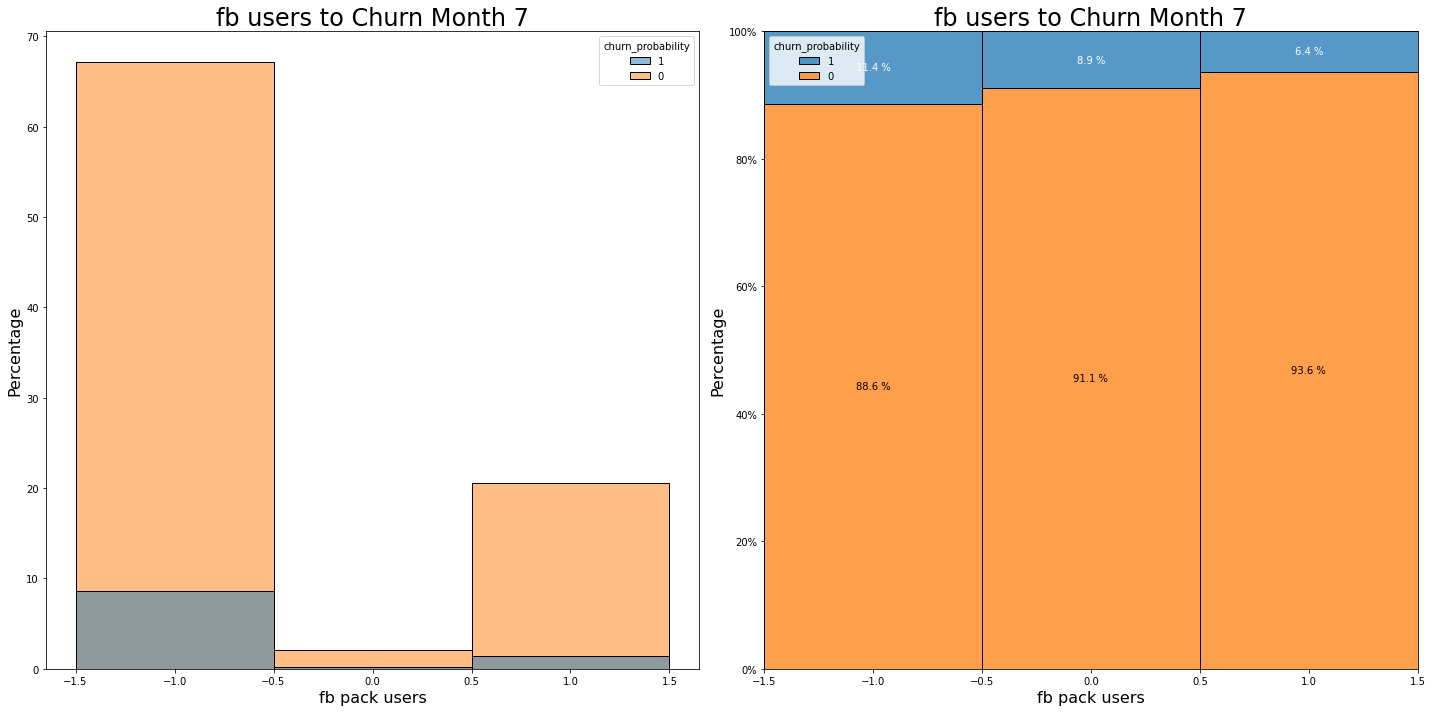

In [122]:
df_cut['fb_user_7'] = df_cut.fb_user_7.astype('category')
bivar_plotting('fb_user_7','fb pack users', 'Percentage', 'fb users to Churn Month 7')

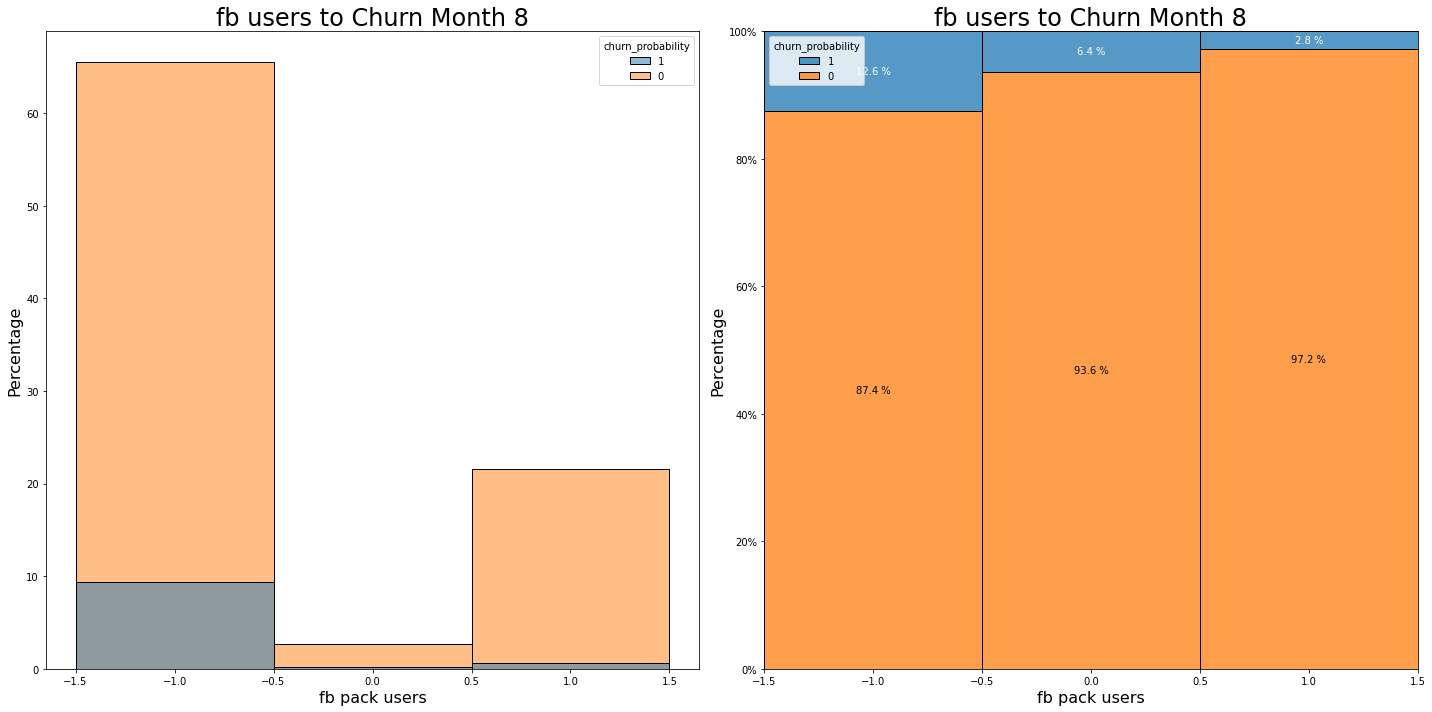

In [123]:
df_cut['fb_user_8'] = df_cut.fb_user_8.astype('category')
bivar_plotting('fb_user_8','fb pack users', 'Percentage', 'fb users to Churn Month 8')

It can be seen that customers with missing data which is got imputted with -1 earlier, they seems to be highest churned according to the data, if they are on night pack or fb pack does not hold much difference that is obvious.


Also it can be seen that as people spent more months with the provider the churn rate reduces.


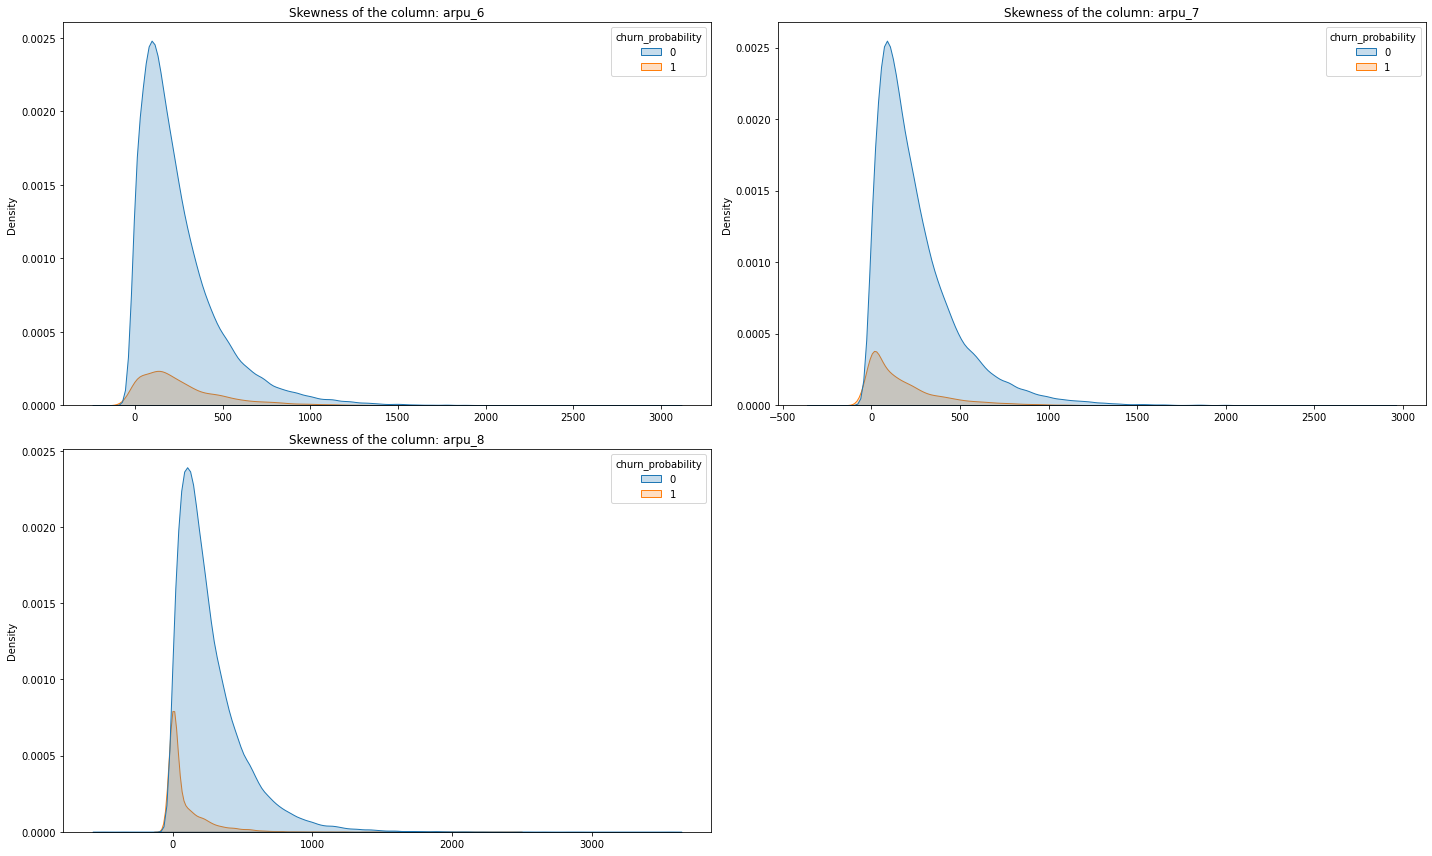

In [124]:
# need to create additional column which will be the sum of months and average
# derived from https://stackoverflow.com/questions/69067250/plotting-multiple-seaborn-displot 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['arpu_6','arpu_7','arpu_8']

for col, ax in zip(cols, axes):
    data = df_cut[[col, 'churn_probability']]  # select the data
    sns.kdeplot(data=data, x=col, hue='churn_probability', shade=True, ax=ax)
    ax.set(title=f'Skewness of the column: {col}', xlabel=None)
    
fig.delaxes(axes[3])  # delete the empty subplot
fig.tight_layout()
plt.show()

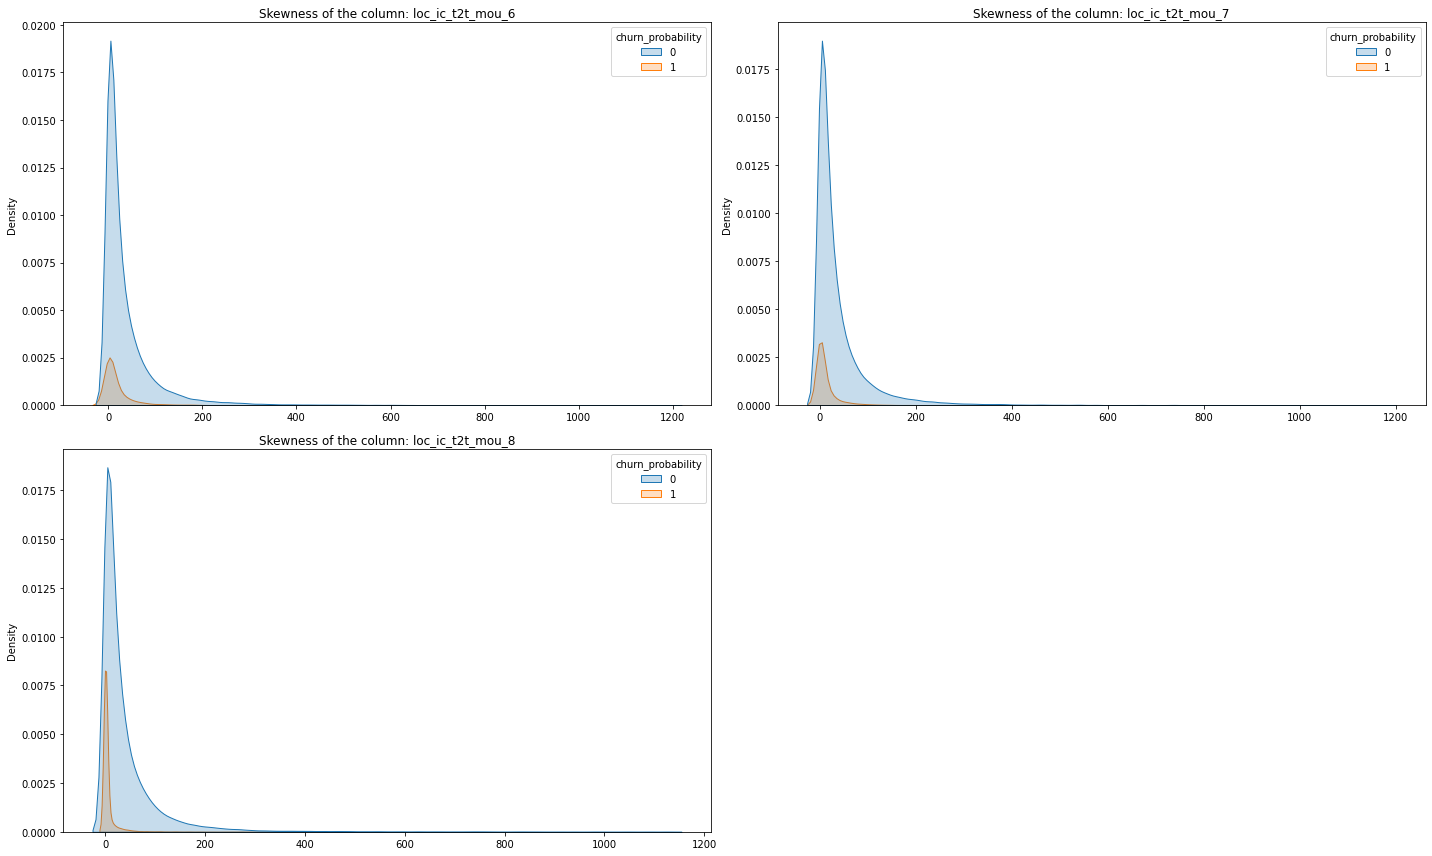

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']

for col, ax in zip(cols, axes):
    data = df_cut[[col, 'churn_probability']]  # select the data
    sns.kdeplot(data=data, x=col, hue='churn_probability', shade=True, ax=ax)
    ax.set(title=f'Skewness of the column: {col}', xlabel=None)
    
fig.delaxes(axes[3])  # delete the empty subplot
fig.tight_layout()
plt.show()

From Observing few of the numerical data it can be seen that data is heavly skewed to the left. 


Next thing to check is the outliers in the dataset. 

In [126]:
def creating_box_hist(column, column2,column3):
    df_cut['churn_probability'] = df_cut.churn_probability.astype('category')
    
    plt.figure(figsize=(30,20))  
    plt.subplot(221)
    sns.boxplot(data=df_cut, x=column, y=column2)
    plt.subplot(222)
    sns.boxplot(data=df_cut, x=column3, y=column2)
    plt.subplot(223)
    sns.boxplot(data=df_cut, x=column, y=column2)
    plt.subplot(224)
    sns.boxplot(data=df_cut, x=column3, y=column2)
    
    plt.show()
    
    

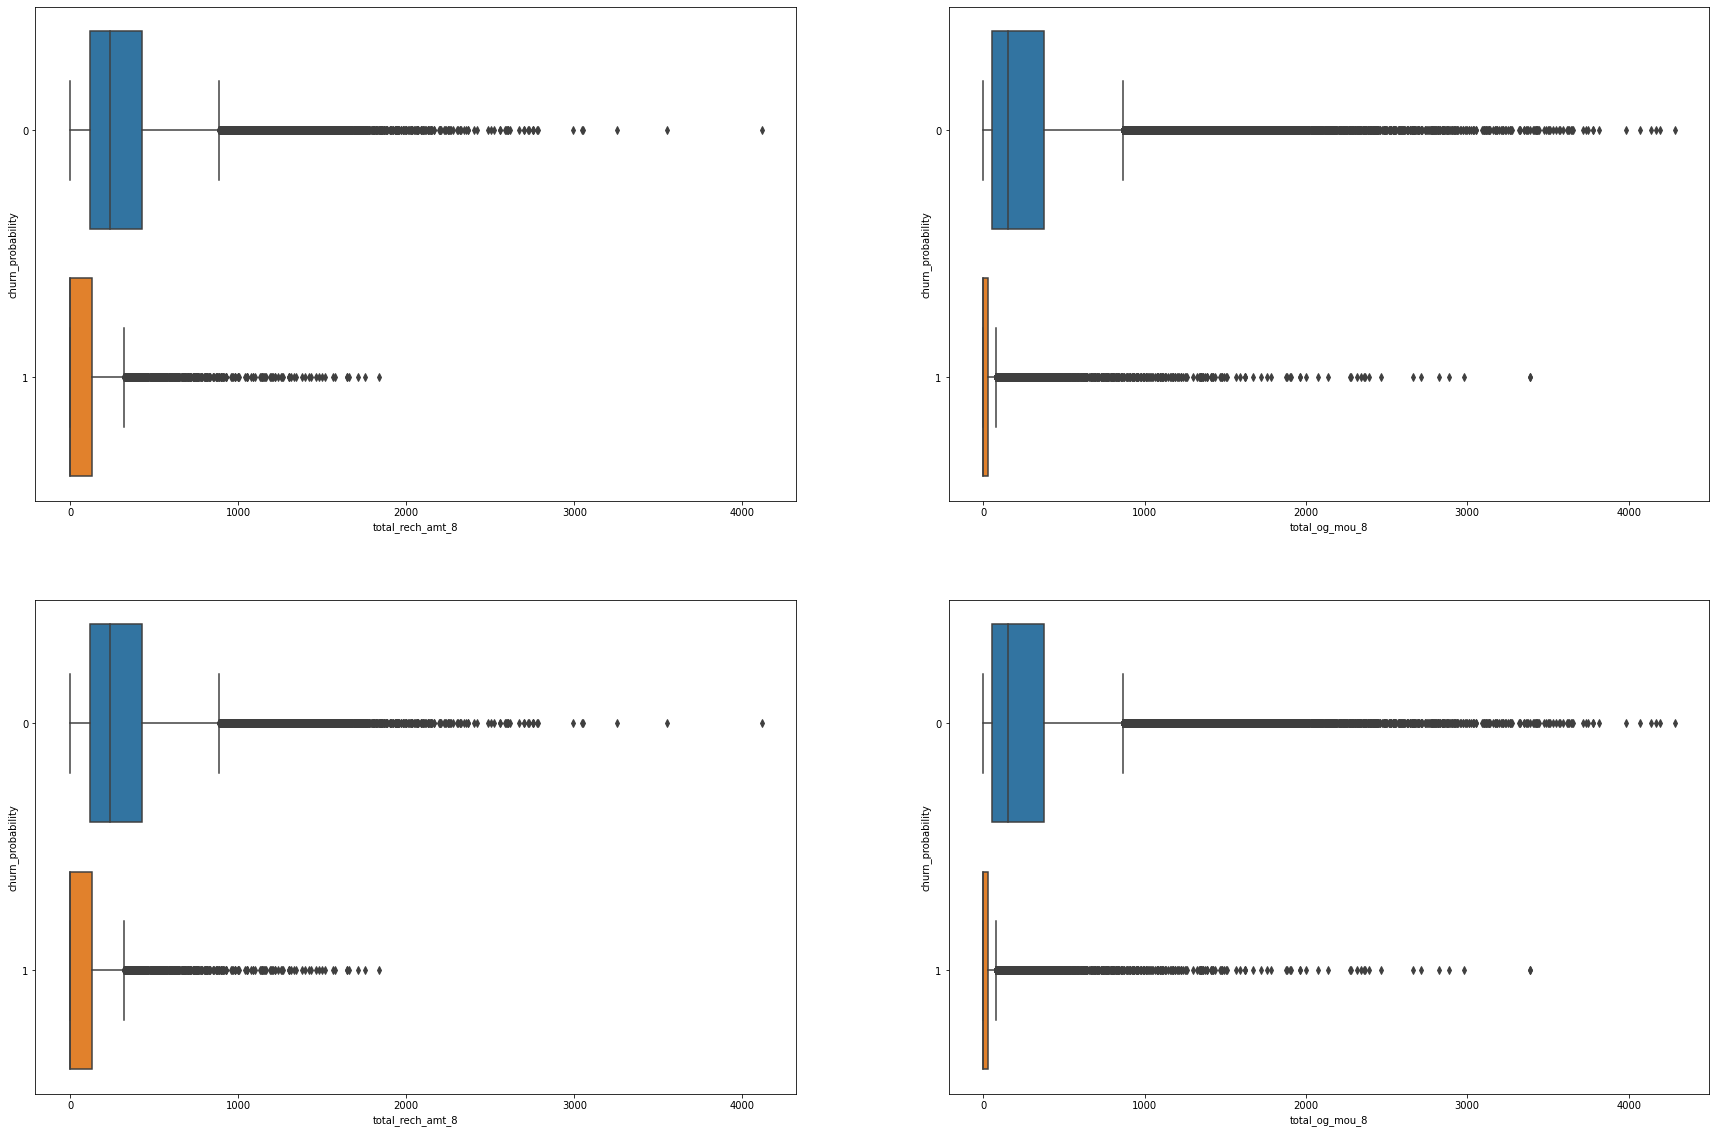

In [127]:
creating_box_hist('total_rech_amt_8','churn_probability','total_og_mou_8' )

In [128]:
# Resetting previously set categorical variables back into numerical format.
df_cut[['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn_probability']] = df_cut[['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn_probability']].apply(pd.to_numeric)

In [129]:
df_cut.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,months_network
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,65
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,23
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49

In [130]:
churn = (sum(df_cut['churn_probability'])/len(df_cut['churn_probability'].index))*100
churn

10.223045409596761

In [131]:
df_cut.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63709 entries, 0 to 69998
Data columns (total 156 columns):
 #    Column              Dtype  
---   ------              -----  
 0    loc_og_t2o_mou      float64
 1    std_og_t2o_mou      float64
 2    loc_ic_t2o_mou      float64
 3    arpu_6              float64
 4    arpu_7              float64
 5    arpu_8              float64
 6    onnet_mou_6         float64
 7    onnet_mou_7         float64
 8    onnet_mou_8         float64
 9    offnet_mou_6        float64
 10   offnet_mou_7        float64
 11   offnet_mou_8        float64
 12   roam_ic_mou_6       float64
 13   roam_ic_mou_7       float64
 14   roam_ic_mou_8       float64
 15   roam_og_mou_6       float64
 16   roam_og_mou_7       float64
 17   roam_og_mou_8       float64
 18   loc_og_t2t_mou_6    float64
 19   loc_og_t2t_mou_7    float64
 20   loc_og_t2t_mou_8    float64
 21   loc_og_t2m_mou_6    float64
 22   loc_og_t2m_mou_7    float64
 23   loc_og_t2m_mou_8    float64
 24   

Churn rate is low at it is only at 6.33% for the high end customers 

In [132]:
# lets drop columns which got high correlation between each other 

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_cut, .6)

std_og_mou_7        std_og_t2t_mou_8      0.600102
total_rech_amt_6    std_og_mou_6          0.600164
std_ic_mou_7        std_ic_t2m_mou_6      0.601150
std_og_mou_8        arpu_8                0.601728
loc_og_mou_6        loc_og_t2t_mou_7      0.602323
total_og_mou_8      total_rech_amt_7      0.602363
                    arpu_7                0.602694
std_og_mou_8        std_og_t2t_mou_7      0.604293
std_ic_t2m_mou_7    std_ic_mou_6          0.604404
std_ic_t2t_mou_7    std_ic_t2t_mou_6      0.605682
std_ic_mou_7        std_ic_t2t_mou_7      0.606547
std_ic_t2t_mou_6    std_ic_mou_6          0.606921
arpu_6              std_og_mou_6          0.607218
std_og_mou_7        total_og_mou_6        0.607461
loc_og_t2t_mou_6    loc_og_mou_7          0.607628
offnet_mou_8        total_og_mou_7        0.607787
loc_og_mou_8        loc_og_t2t_mou_7      0.608498
last_day_rch_amt_7  max_rech_amt_7        0.609334
arpu_7              std_og_mou_7          0.610472
loc_ic_t2m_mou_6    total_ic_mo

In [133]:
# some of the columns higher than 90% correlation will be dropped

final_df = df_cut.drop(['aon'],axis=1)

### Step 4  : Modelling

In [134]:
#inserting features in to X and response variable y
X = final_df.drop(['churn_probability'], axis=1)
y = final_df['churn_probability']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [135]:
#split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44596, 154)
(19113, 154)
(44596,)
(19113,)


In [136]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Handling of Data imbalance 

As seen previously data is heavly imbalanced one of the approach available to migigate this is SMOT (Synthetic minority oversampling technique), as susggested by the name this oversamples the minority class by duplicating examples from minority class. 

In [137]:
# this can be easily seen below
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 40057, 1: 4539})


In [138]:
sm = SMOTE(random_state=42)
X_train_re, y_train_re = sm.fit_resample(X_train, y_train)


In [139]:
counter = Counter()
print(counter)

Counter()


Now since we sorted out imbanalce using SMOTE, we can use PCA for dimensionality reduction

#### PCA

In [497]:
#PCA setting
pc = PCA()
pca = Pipeline(steps=[("pca", pc)])



In [498]:
pca.fit(X_train_re)

Pipeline(steps=[('pca', PCA())])

In [499]:
pc.components_

array([[-4.88340855e-19,  2.22044605e-16, -0.00000000e+00, ...,
         8.04654992e-03,  1.26007609e-02,  6.97825008e-03],
       [ 1.78694550e-19,  6.93889390e-17,  1.52655666e-16, ...,
         1.46281220e-02,  2.00651395e-03,  6.00763438e-02],
       [-4.24172339e-20,  2.28983499e-16, -2.98372438e-16, ...,
         7.01720146e-03,  2.61131580e-03,  5.66658153e-02],
       ...,
       [ 0.00000000e+00,  1.81648887e-02, -2.72034786e-02, ...,
        -1.33259413e-03, -2.88633007e-03, -1.30104261e-18],
       [ 9.99999988e-01,  2.88700863e-09, -9.23483008e-09, ...,
        -3.77198327e-06, -2.82185188e-06, -1.32709197e-18],
       [-0.00000000e+00,  9.44951985e-01,  1.22567371e-01, ...,
         2.94607542e-02,  6.42667945e-03, -1.38777878e-16]])

In [500]:
#looking at the explained variance ratio of each compoent 
pc.explained_variance_ratio_

array([5.50625191e-01, 1.36201879e-01, 9.27515865e-02, 4.10474162e-02,
       2.54858297e-02, 1.81086193e-02, 1.35531587e-02, 1.11516828e-02,
       1.08986240e-02, 7.63876767e-03, 6.96634861e-03, 5.94219206e-03,
       4.86321212e-03, 4.51020893e-03, 3.76659013e-03, 3.54129481e-03,
       3.39692848e-03, 3.01751645e-03, 2.88814177e-03, 2.76562804e-03,
       2.65600128e-03, 2.55210430e-03, 2.33166042e-03, 2.19615265e-03,
       2.02169302e-03, 1.95288860e-03, 1.83661051e-03, 1.82616884e-03,
       1.80499146e-03, 1.60043045e-03, 1.54170379e-03, 1.44598300e-03,
       1.38738513e-03, 1.33994375e-03, 1.17551642e-03, 1.16049996e-03,
       1.11419026e-03, 1.04267335e-03, 9.59661076e-04, 9.19834400e-04,
       7.87979765e-04, 7.57377774e-04, 7.05752706e-04, 6.86268002e-04,
       6.54357642e-04, 6.35477764e-04, 6.29441409e-04, 6.20666718e-04,
       5.78838563e-04, 5.63447237e-04, 5.50809248e-04, 5.10481231e-04,
       4.79306127e-04, 4.71587990e-04, 4.67278428e-04, 4.30013352e-04,
      

In [501]:
pca = pca.named_steps['pca']

with pd.option_context('display.max_rows', None,):
    print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       55.06
1       68.68
2       77.96
3       82.06
4       84.61
5       86.42
6       87.78
7       88.89
8       89.98
9       90.75
10      91.44
11      92.04
12      92.52
13      92.97
14      93.35
15      93.71
16      94.04
17      94.35
18      94.64
19      94.91
20      95.18
21      95.43
22      95.67
23      95.89
24      96.09
25      96.28
26      96.47
27      96.65
28      96.83
29      96.99
30      97.14
31      97.29
32      97.43
33      97.56
34      97.68
35      97.80
36      97.91
37      98.01
38      98.11
39      98.20
40      98.28
41      98.35
42      98.42
43      98.49
44      98.56
45      98.62
46      98.68
47      98.75
48      98.80
49      98.86
50      98.92
51      98.97
52      99.01
53      99.06
54      99.11
55      99.15
56      99.19
57      99.23
58      99.27
59      99.31
60      99.34
61      99.37
62      99.40
63      99.43
64      99.46
65      99.49
66      99.52
67      99.54
68      99.56
69      99.59
70      99.61
71    

In [502]:
#Making a scree plot on the explained variances

var_cumu = np.cumsum(pca.explained_variance_ratio_)

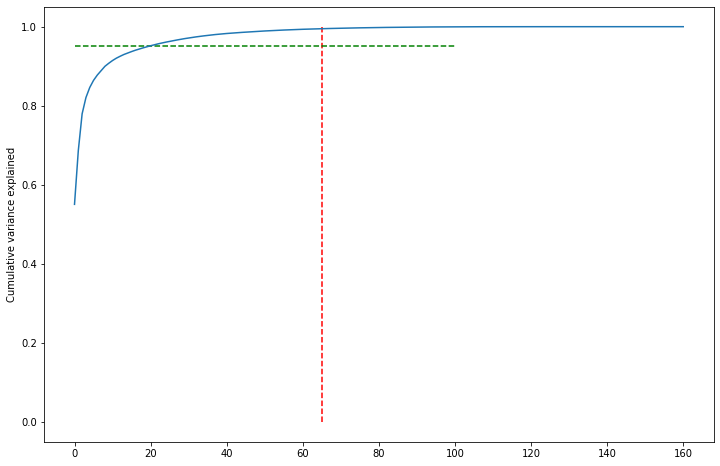

In [503]:
%matplotlib inline
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Scree plot shows that with 30 features we can safely explain the 97% of the data.

with 50 this goes up to 99%

In [504]:
pca_final = IncrementalPCA(n_components=65)

In [505]:
X_train_pca = pca_final.fit_transform(X_train_re)
X_train_pca.shape

(27020, 65)

In [506]:
#Creating a correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

In [507]:
corrmat.shape

(65, 65)

Plotting heatmap for the correlation matrix

<AxesSubplot: >

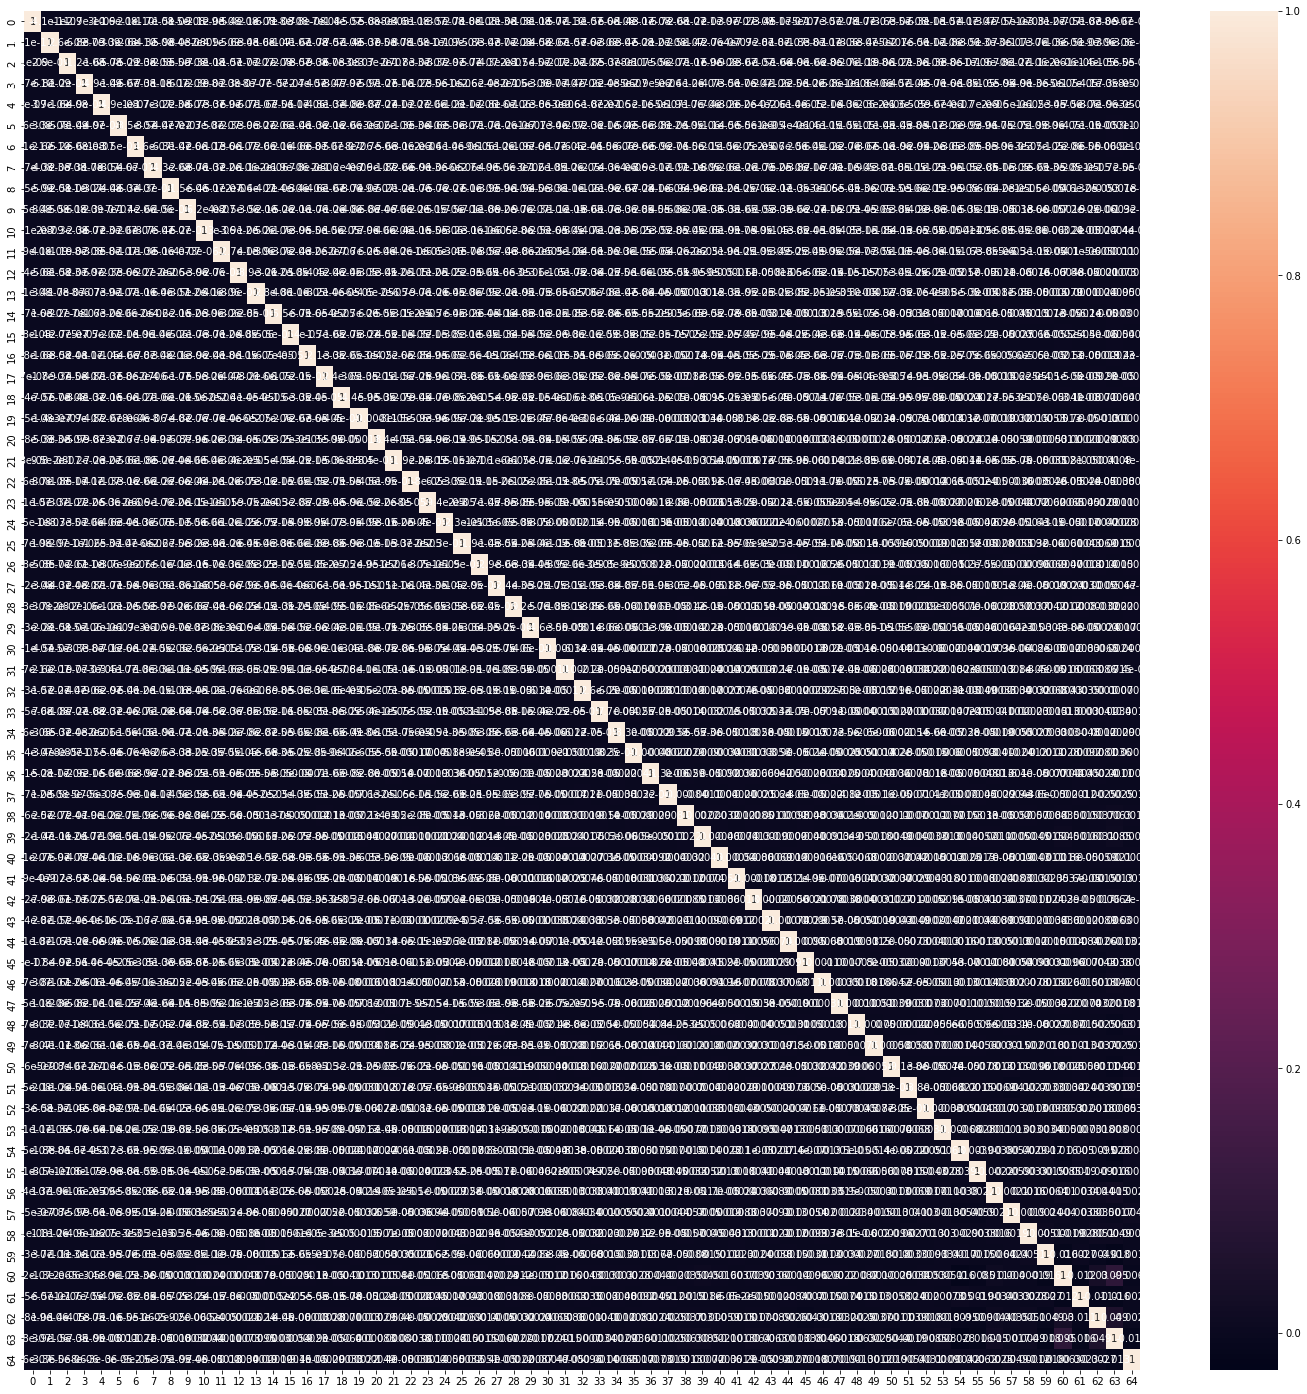

In [508]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [509]:
# Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape


(6304, 65)

Several different models will be used below to assess best predictor for churn (shown below)
1. Logistic Regression
2. Decision Tree
3. Random Forrest 
4. Boosting Model - Gradient Boosting Classifier
5. Boosting Model - XgBoost Classifier
6. SVM

#### 1. Logistic Regression

In [62]:
def logreg(model, X_train, y_train):
    model.fit(X_train, y_train)
        
    predict1 = model.predict(X_train)
    pred_prob_test = model.predict_proba(X_train)[:,1]

    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, predict1))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, predict1))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, pred_prob_test))
    

    
def confusion_read(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test, y_pred))
    print("Sensitivity = ",TP / float(TP+FN))
    print("Specificity = ",TN / float(TN+FP))
    print("False Positive Rate = ",FP/ float(TN+FP))
    print ("Precision = ",TP / float(TP+FP))
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))
    cm_plot = ConfusionMatrixDisplay(cm).plot()
    cm_plot

In [511]:
df_pca_lr = LogisticRegression()
logreg(df_pca_lr, X_train_pca, y_train_re)


Model Report
Accuracy : 0.8426
Recall/Sensitivity : 0.8623
AUC Score (Train): 0.912273


Accuracy : 0.8122
Sensitivity =  0.8092592592592592
Specificity =  0.8152324774462179
False Positive Rate =  0.1847675225537821
Precision =  0.29094540612516645
True Negative Prediction Rate =  0.9785506039150355


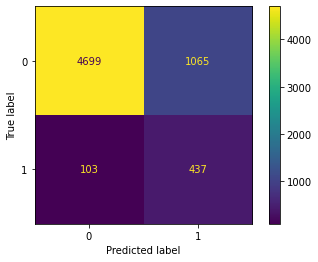

In [512]:
pred_test = df_pca_lr.predict(X_test_pca)
ypred_prob = df_pca_lr.predict_proba(X_test_pca)[::,1]
confusion_read(y_test,pred_test)

 


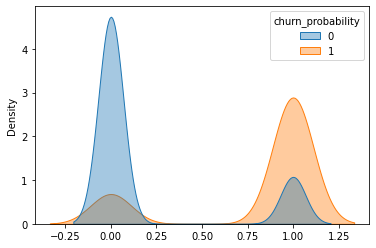

In [513]:
sns.kdeplot(x=pred_test, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

Next will be plot an ROC curve as it explains the trade off between TPR (sensitivity) and FPR (specificity)

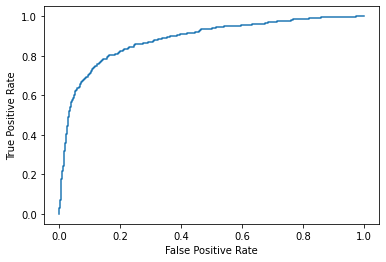

In [514]:

false_p_r, true_p_r, _ = metrics.roc_curve(y_test,  ypred_prob)

plt.plot(false_p_r,true_p_r)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As we can see from the graph the curve is lying top of the left corner this shows that it is a descent fit

In [515]:
print("AUC Score:", round(roc_auc_score(y_test, ypred_prob),2))

AUC Score: 0.88


cefddAUC score is 0.88 which is a descent score for this model

Hypertuning Model - PCA and Logistic Regression



In [516]:
# Solution derived from https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
pca = PCA()
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#previously no class weights has been applied for the imbalance, lets try multiple class weights
scaler = StandardScaler()

logistic = LogisticRegression(random_state=42)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [80,90,100],
    "logistic__C": [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']
}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


search = GridSearchCV(pipe, param_grid, n_jobs=1,cv= folds)


In [517]:
search.fit(X_train_re, y_train_re)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.849):
{'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 100}


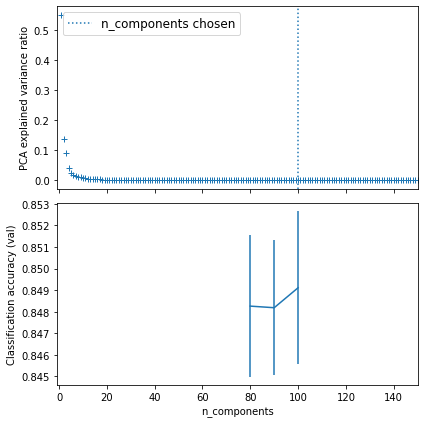

In [518]:
# Plot the PCA spectrum
pca.fit(X_train_re)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 150)

plt.tight_layout()
plt.show()

In [519]:
#pd.DataFrame(search.cv_results_)

In [520]:
print("Best AUC: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)

Best AUC:  0.8491117690599556
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 100}


Accuracy : 0.8188
Sensitivity =  0.8092592592592592
Specificity =  0.8284177654406663
False Positive Rate =  0.1715822345593338
Precision =  0.3064516129032258
True Negative Prediction Rate =  0.9788847888478884


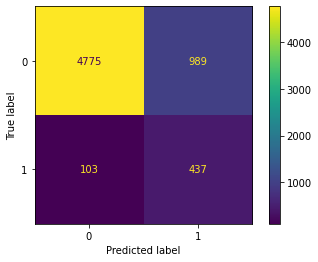

In [521]:
y_pred2 = search.predict(X_test)

ypred_prob2 = search.predict_proba(X_test)[:,1]
confusion_read(y_test,y_pred2)

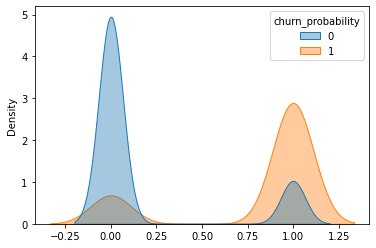

In [522]:
sns.kdeplot(x=y_pred2, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

#### Decision Tree

In [523]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [524]:
# Create parameter grid based on results of random search
params = {
    'max_depth': [ 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 100,150]
}



In [525]:
grid_search = GridSearchCV(estimator=dec_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [526]:
%%time
grid_search.fit(X_train_re, y_train_re)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
CPU times: user 5.43 s, sys: 416 ms, total: 5.85 s
Wall time: 4min 20s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [527]:
score_dec = pd.DataFrame(grid_search.cv_results_)
score_dec.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.694067,0.014762,0.008487,0.002452,5,5,50,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.867209,0.888231,0.88453,0.886899,0.881717,0.008480,31
1,1.636229,0.019237,0.006289,0.000596,5,5,100,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.867209,0.888231,0.88453,0.886899,0.881717,0.008480,31
2,1.604291,0.024670,0.006158,0.000232,5,5,150,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.867209,0.888231,0.88453,0.886899,0.881717,0.008480,31
3,1.605718,0.025862,0.006020,0.000229,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.867209,0.888231,0.88453,0.886603,0.881643,0.008436,34
4,1.625127,0.017701,0.006164,0.000130,5,10,100,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.867209,0.888231,0.88453,0.886603,0.881643,0.008436,34


In [528]:
score_dec.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,2.929613,0.004643,0.007560,0.001795,10,5,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.881569,0.910141,0.908068,0.911325,0.902776,0.012299,1
21,2.872978,0.030466,0.006208,0.000103,10,20,50,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.882161,0.907772,0.906144,0.906588,0.900666,0.010700,2
18,2.935411,0.020892,0.006475,0.000670,10,10,50,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.879053,0.907032,0.906884,0.906440,0.899852,0.012011,3
36,4.275909,0.056532,0.006720,0.000306,20,20,50,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.876240,0.907772,0.906588,0.905699,0.899075,0.013204,4
30,4.715065,0.084796,0.006482,0.000252,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.876092,0.905255,0.906440,0.908364,0.899038,0.013294,5


In [529]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [530]:
best_dec = DecisionTreeClassifier( random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

In [531]:
best_dec.fit(X_train_re, y_train_re)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

In [63]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_re, dt_classifier.predict(X_train_re)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_re, dt_classifier.predict(X_train_re)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [533]:
evaluate_model(best_dec)

Train Accuracy : 0.8860103626943006
Train Confusion Matrix:
[[11677  1833]
 [ 1247 12263]]
--------------------------------------------------
Test Accuracy : 0.8489847715736041
Test Confusion Matrix:
[[4932  832]
 [ 120  420]]


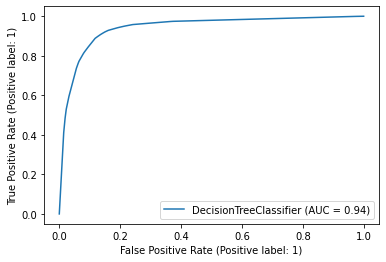

In [534]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_dec, X_train_re, y_train_re, drop_intermediate=False)
plt.show()

#### Random Forest with PCA

In [535]:
rand_for = RandomForestClassifier(n_estimators=90, max_depth=5, max_features=5, random_state=100, oob_score=True)

In [536]:
%%time
rand_for.fit(X_train_pca, y_train_re)

CPU times: user 6.87 s, sys: 19.1 ms, total: 6.89 s
Wall time: 6.86 s


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=90,
                       oob_score=True, random_state=100)

In [537]:
rand_for.oob_score_

0.8199851961509993

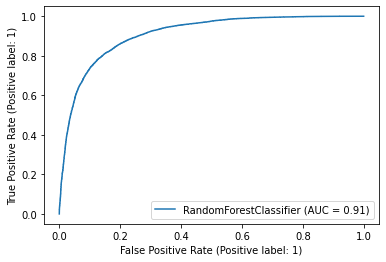

In [538]:
plot_roc_curve(rand_for, X_train_pca, y_train_re, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Random Forest


In [539]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [540]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [ 90, 100]
}

In [541]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [542]:
%%time
grid_search.fit(X_train_re, y_train_re)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


KeyboardInterrupt: ignored

In [543]:
grid_search.best_score_

AttributeError: ignored

In [ ]:
grid_search.best_params_

In [ ]:
rf_up = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=5,
                             n_estimators=100)

In [ ]:
rf_up.fit(X_train_re, y_train_re)

In [ ]:
evaluate_model(rf_up)

In [ ]:
plot_roc_curve(rf_up, X_train_re, y_train_re, drop_intermediate=False)
plt.show()

In [ ]:
print("Classification Report: \n {}\n".format(classification_report(y_test, rf_up.predict(X_test))))

### XGBoost Model

In [ ]:
xg_b = xgb.XGBClassifier(random_state=42, n_jobs=-1,gpu_id=-1,objective="binary:logistic",eval_metric=['error','auc'],
                         colsample_bytree=1,min_child_weight=1,verbosity=1,subsample=1)

In [ ]:
params = {
    'min_child_weight': [100,200, 500,100],
    'max_depth' : [10, 6 , 2]
}

In [ ]:
xg_grid = GridSearchCV(estimator=xg_b,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
#xg_grid.fit(X_train_re, y_train_re)

In [ ]:
#xg_grid.best_score_

In [ ]:
#xg_grid.best_params_

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=20, n_estimators=80, learning_rate=0.2,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1,min_child_weight=50,
                           objective="binary:logistic",eval_metric=['error','auc'], random_state=42, max_delta_step= 5,
                            colsample_bytree=0.5,colsample_bylevel=0.5,colsample_bynode=0.5)
xgb_clf.fit(X_train_re, y_train_re)

In [184]:
print("Classification Report: \n {}\n".format(classification_report(y_train_re, xgb_clf.predict(X_train_re))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     40057
           1       0.97      0.97      0.97     40057

    accuracy                           0.97     80114
   macro avg       0.97      0.97      0.97     80114
weighted avg       0.97      0.97      0.97     80114




In [185]:
evaluate_model(xgb_clf)

Train Accuracy : 0.9665851162094016
Train Confusion Matrix:
[[38699  1358]
 [ 1319 38738]]
--------------------------------------------------
Test Accuracy : 0.9314602626484592
Test Confusion Matrix:
[[16406   733]
 [  577  1397]]


In [186]:
xgb_pred = xgb_clf.predict(X_test)

print("Classification Report: \n {}\n".format(classification_report(y_test, xgb_pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     17139
           1       0.66      0.71      0.68      1974

    accuracy                           0.93     19113
   macro avg       0.81      0.83      0.82     19113
weighted avg       0.93      0.93      0.93     19113




Accuracy : 0.8325
Sensitivity =  0.7077001013171226
Specificity =  0.9572320438765389
False Positive Rate =  0.04276795612346111
Precision =  0.655868544600939
True Negative Prediction Rate =  0.9660248483777896


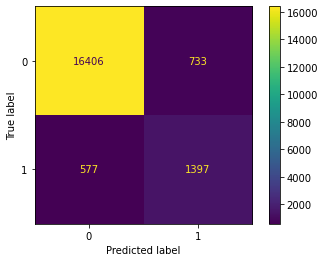

In [187]:
confusion_read(y_test,xgb_pred)

#### Test Data Preparation

In [1187]:
df_test = pd.read_csv('test.csv')

In [1188]:
df_test.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [1189]:
df_test.shape

(30000, 171)

In [1190]:
df_test_id = df_test['id']

In [1191]:
df_test['months_network'] = (df_test['aon'])//30
#Drop the columns since we already have months from the date
df_test.drop('aon', axis=1, inplace = True)

In [1192]:
recharge = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

df_test[recharge] = df_test[recharge].apply(lambda x: x.fillna(0))

relat_rech = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8']

df_test[relat_rech] = df_test[relat_rech].apply(lambda x: x.fillna(-1))

In [1193]:
date_col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df_test = df_test.drop(date_col, axis =1)

In [1194]:
df_test = df_test.drop(['id','circle_id'], axis =1)

In [1195]:
df_test['total_d_6'] = df_test['total_rech_data_6'] * df_test['av_rech_amt_data_6']
df_test['total_d_7'] = df_test['total_rech_data_7'] * df_test['av_rech_amt_data_7']
df_test['total_d_8'] = df_test['total_rech_data_8'] * df_test['av_rech_amt_data_8']

In [1196]:
df_test['total_recharge_6'] = df_test['total_d_6'] + df_test['total_rech_amt_6']
df_test['total_recharge_7'] = df_test['total_d_7'] + df_test['total_rech_amt_7']
df_test['total_recharge_8'] = df_test['total_d_8'] + df_test['total_rech_amt_8']

In [1197]:
# now find the average of the three months
df_test['avergae_rec_6_7_8'] = (df_test['total_recharge_6']+df_test['total_recharge_7'] )/2

In [1198]:
#df_test = df_test.drop(['sachet_2g_8', 'sachet_2g_7','sachet_2g_6','night_pck_user_6','night_pck_user_7',
#              'arpu_8','arpu_7','isd_og_mou_8','arpu_6','night_pck_user_8',
 #             'total_d_8','arpu_2g_7','arpu_2g_6','isd_og_mou_6','total_d_7','arpu_2g_8',
 #             'isd_og_mou_6','total_d_6','count_rech_2g_7',
 #             'count_rech_2g_6','sachet_2g_7','count_rech_2g_8','sachet_2g_6','arpu_3g_6','arpu_3g_7','arpu_3g_8'],axis=1)




In [1199]:
df_test = df_test.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis =1)

In [1200]:
df_test = df_test.fillna(0)

In [1201]:
df_test_run = pca_final.transform(df_test)

In [1202]:
df_test_run.shape

(30000, 65)

In [1203]:
final_pred = xgb_clf.predict(df_test)

In [1204]:
final_pred.shape

(30000,)

In [1205]:
df_test_id.shape

(30000,)

In [1206]:
final_test_list = pd.DataFrame({'id':df_test_id,'churn_probability':final_pred})

In [1207]:
final_test_list.to_csv('submission.csv',index=False)